In [4]:
######## Import useful libraries ###########


import pandas as pd
import pickle
import matplotlib.pyplot as plt
import numpy as np
import matplotlib

%matplotlib inline 

# Predictive model

## I. Preparing Tabular Data

#### Upload pickled data

In [80]:
# Opening the Pickle train data set X
with open("train_TFIDF_SVD.pickle", 'rb') as f:
    train = pickle.load(f)

In [81]:
# Opening the Pickle validation set X
with open("test_TFIDF_SVD.pickle", 'rb') as f:
    test = pickle.load(f)

In [83]:
train['log_price'] = np.log1p(train['price'])
test['log_price'] = np.log1p(test['price'])

In [84]:
train.head(3)

,name,item_condition_id,main_cat,subcat_1,subcat_2,brand_name,price,shipping,item_description,TFIDF_feature_1,...,TFIDF_feature_12,TFIDF_feature_13,TFIDF_feature_14,TFIDF_feature_15,TFIDF_feature_16,TFIDF_feature_17,TFIDF_feature_18,TFIDF_feature_19,TFIDF_feature_20,log_price
1,Razer BlackWidow Chroma Keyboard,3,Electronics,Computers & Tablets,Components & Parts,Razer,52.0,0,This keyboard is in great condition and works ...,0.003809,...,-0.018905,-0.014720,0.073910,0.024175,-0.049895,-0.031660,-0.019666,-0.007581,0.021695,3.970292
2,AVA-VIV Blouse,1,Women,Tops & Blouses,Blouse,Target,10.0,1,Adorable top with a hint of lace and a key hol...,0.002652,...,-0.029146,-0.033790,0.042279,-0.021650,-0.004137,-0.014702,-0.046847,0.007405,-0.002259,2.397895
6,Acacia pacific tides santorini top,3,Women,Swimwear,Two-Piece,Acacia Swimwear,64.0,0,Size small but straps slightly shortened to fi...,0.006558,...,-0.000776,-0.051565,0.001984,0.099189,0.134654,-0.028019,0.004314,0.052799,0.047139,4.174387


#### 2) Splitting data into training and validation sets

In [ ]:
# I skip this part because I will use a SVD decomposition for description 

#### 3) Dealing with categorical variables

In [85]:
# Train set
from sklearn.preprocessing import LabelEncoder

print("Handling categorical variables for train set...")
lbl_enc = LabelEncoder()

lbl_enc.fit(np.hstack([train.brand_name, train.main_cat, train.subcat_1, train.subcat_2]))
train['brand'] = lbl_enc.transform(train.brand_name)
train['category_1'] = lbl_enc.transform(train.main_cat)
train['category_2'] = lbl_enc.transform(train.subcat_1)
train['category_3'] = lbl_enc.transform(train.subcat_2)

print("Finished!")

Handling categorical variables for train set...
Finished!


In [86]:
# Validation set
print("Handling categorical variables for test set...")
#lbl_enc = LabelEncoder()

lbl_enc.fit(np.hstack([test.brand_name, test.main_cat, test.subcat_1, test.subcat_2]))
test['brand'] = lbl_enc.transform(test.brand_name)
test['category_1'] = lbl_enc.transform(test.main_cat)
test['category_2'] = lbl_enc.transform(test.subcat_1)
test['category_3'] = lbl_enc.transform(test.subcat_2)


print("Finished!")

Handling categorical variables for test set...
Finished!


In [88]:
train.head(3)

,name,item_condition_id,main_cat,subcat_1,subcat_2,brand_name,price,shipping,item_description,TFIDF_feature_1,...,TFIDF_feature_16,TFIDF_feature_17,TFIDF_feature_18,TFIDF_feature_19,TFIDF_feature_20,log_price,brand,category_1,category_2,category_3
1,Razer BlackWidow Chroma Keyboard,3,Electronics,Computers & Tablets,Components & Parts,Razer,52.0,0,This keyboard is in great condition and works ...,0.003809,...,-0.049895,-0.031660,-0.019666,-0.007581,0.021695,3.970292,3840,1541,1157,1155
2,AVA-VIV Blouse,1,Women,Tops & Blouses,Blouse,Target,10.0,1,Adorable top with a hint of lace and a key hol...,0.002652,...,-0.004137,-0.014702,-0.046847,0.007405,-0.002259,2.397895,4522,5013,4678,641
6,Acacia pacific tides santorini top,3,Women,Swimwear,Two-Piece,Acacia Swimwear,64.0,0,Size small but straps slightly shortened to fi...,0.006558,...,0.134654,-0.028019,0.004314,0.052799,0.047139,4.174387,77,5013,4469,4767


#### 4) Vectorising the item full description

In [ ]:
# I skip this part because I will use a SVD decomposition for description 

#### 5) Forming final sets

In [116]:
y_train = train.log_price
y_valid = test.log_price
X_train = train.drop(['name','main_cat', 'subcat_1', 'subcat_2', 'brand_name', 'price', 'item_description', 'log_price'], axis=1)
X_valid = test.drop(['name','main_cat', 'subcat_1', 'subcat_2', 'brand_name', 'price', 'item_description', 'log_price'], axis=1)

In [117]:
X_train.head(3)

,item_condition_id,shipping,TFIDF_feature_1,TFIDF_feature_2,TFIDF_feature_3,TFIDF_feature_4,TFIDF_feature_5,TFIDF_feature_6,TFIDF_feature_7,TFIDF_feature_8,...,TFIDF_feature_15,TFIDF_feature_16,TFIDF_feature_17,TFIDF_feature_18,TFIDF_feature_19,TFIDF_feature_20,brand,category_1,category_2,category_3
1,3,0,0.003809,0.072029,-0.060521,-0.069545,0.038071,-0.010755,-0.043477,0.086733,...,0.024175,-0.049895,-0.031660,-0.019666,-0.007581,0.021695,3840,1541,1157,1155
2,1,1,0.002652,0.052031,-0.023326,0.020730,-0.052213,0.020922,0.003852,0.013506,...,-0.021650,-0.004137,-0.014702,-0.046847,0.007405,-0.002259,4522,5013,4678,641
6,3,0,0.006558,0.143947,-0.142753,0.012790,-0.079155,-0.090236,0.027279,0.008431,...,0.099189,0.134654,-0.028019,0.004314,0.052799,0.047139,77,5013,4469,4767


In [118]:
y_train.head(3)

1    3.970292
2    2.397895
6    4.174387
Name: log_price, dtype: float64

#### 6) Saving pickle

In [119]:
#Saving our data-sets
y_train.to_pickle("y_train.pickle")
y_valid.to_pickle("y_valid.pickle")
X_train.to_pickle("X_train.pickle")
X_valid.to_pickle("X_valid.pickle")

## II. Fitting a predictive model

In [96]:
X_train.head(3)

,item_condition_id,shipping,TFIDF_feature_1,TFIDF_feature_2,TFIDF_feature_3,TFIDF_feature_4,TFIDF_feature_5,TFIDF_feature_6,TFIDF_feature_7,TFIDF_feature_8,...,TFIDF_feature_16,TFIDF_feature_17,TFIDF_feature_18,TFIDF_feature_19,TFIDF_feature_20,log_price,brand,category_1,category_2,category_3
1,3,0,0.003809,0.072029,-0.060521,-0.069545,0.038071,-0.010755,-0.043477,0.086733,...,-0.049895,-0.031660,-0.019666,-0.007581,0.021695,3.970292,3840,1541,1157,1155
2,1,1,0.002652,0.052031,-0.023326,0.020730,-0.052213,0.020922,0.003852,0.013506,...,-0.004137,-0.014702,-0.046847,0.007405,-0.002259,2.397895,4522,5013,4678,641
6,3,0,0.006558,0.143947,-0.142753,0.012790,-0.079155,-0.090236,0.027279,0.008431,...,0.134654,-0.028019,0.004314,0.052799,0.047139,4.174387,77,5013,4469,4767


## Linear regression

In [155]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

lm = linear_model.LinearRegression()
model_lm = lm.fit(X_train, y_train)
predictions_lm = lm.predict(X_valid)

Coefficients: 
 [ -9.13054133e-02  -2.73011265e-01  -1.31741812e-01   1.06241049e-01
   1.72017240e-01  -5.91075329e-01   3.57001526e-01   4.01748172e-01
   4.00658637e-02   3.40429028e-01   5.60210028e-01  -1.20380918e+00
  -9.14452971e-01  -1.10770322e+00   6.22157371e-01   1.07327720e+00
  -4.82143705e-01   1.39665928e-01  -1.09569717e+00  -2.49619060e-02
   6.75693818e-01  -6.55600114e-01   1.05700760e-05   7.00719025e-05
  -1.70136481e-05  -1.97199261e-05]
Mean squared error: 0.50
R-squared: 0.11


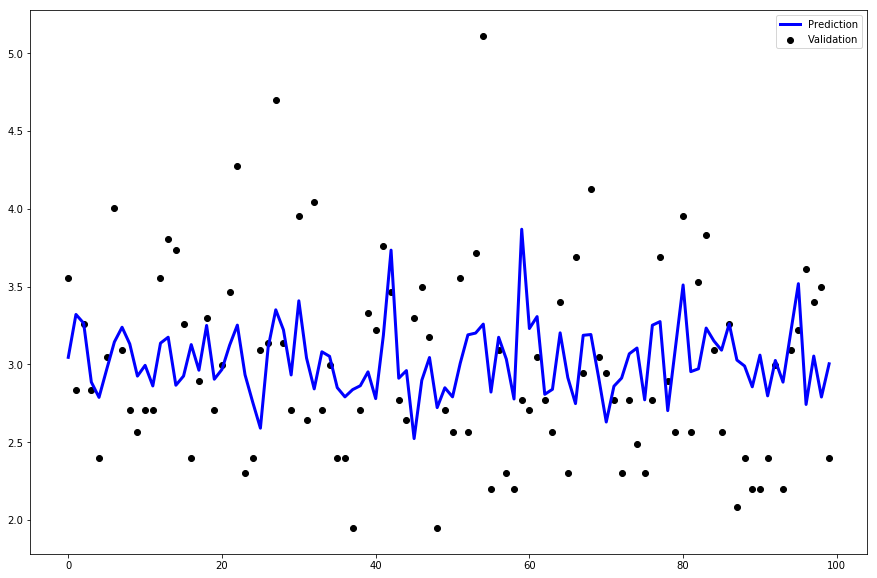

In [156]:
# The coefficients
print('Coefficients: \n', lm.coef_)

# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_valid, predictions_lm))

# Explained variance score: 1 is perfect prediction
print('R-squared: %.2f' % r2_score(y_valid, predictions_lm))

# Plot outputs
plt.figure(figsize=(15,10))
plt.scatter(range(100), y_valid[0:100],  color='black', label="Validation")
plt.plot(range(100), predictions_lm[0:100], color='blue', linewidth=3, label="Prediction")

plt.legend()

plt.show()

### SGDRegressor

Linear model fitted by minimizing a regularized empirical loss with SGD

SGD stands for Stochastic Gradient Descent: the gradient of the loss is estimated each sample at a time and the model is updated along the way with a decreasing strength schedule (aka learning rate).

The regularizer is a penalty added to the loss function that shrinks model parameters towards the zero vector using either the squared euclidean norm L2 or the absolute norm L1 or a combination of both (Elastic Net). If the parameter update crosses the 0.0 value because of the regularizer, the update is truncated to 0.0 to allow for learning sparse models and achieve online feature selection.

This implementation works with data represented as dense numpy arrays of floating point values for the features.

Read more in the User Guide.

In [172]:
from sklearn.linear_model import SGDRegressor

sgdr = linear_model.SGDRegressor(penalty='l1')
sgdr.fit(X_train, y_train)
predictions_sgdr = sgdr.predict(X_valid)

In [173]:
predictions_sgdr

array([  2.76816113e+15,   1.29988632e+15,   3.81652864e+15, ...,
         8.14526474e+14,   2.81655911e+15,   2.81765222e+15])

Coefficients: 
 [ -4.63891083e+11  -6.14102996e+11   2.77780999e+10  -2.82900440e+10
  -7.21065307e+10   4.23044556e+10  -4.72077610e+10  -3.33777316e+10
  -9.68914540e+09   8.58304631e+09  -8.41784908e+10  -2.96944572e+10
   4.85398366e+10   1.86609124e+10  -1.16387527e+10   7.56973631e+10
  -5.57283661e+10   4.88912492e+10   6.84134262e+10  -6.27503131e+10
  -3.94659498e+10   6.62826351e+10   1.92837889e+11  -5.07282240e+11
  -8.93841314e+11   2.16102846e+11]
Mean squared error: 7396226186657253628491388157952.00
R-squared: -13154871069161036253815220731904.00


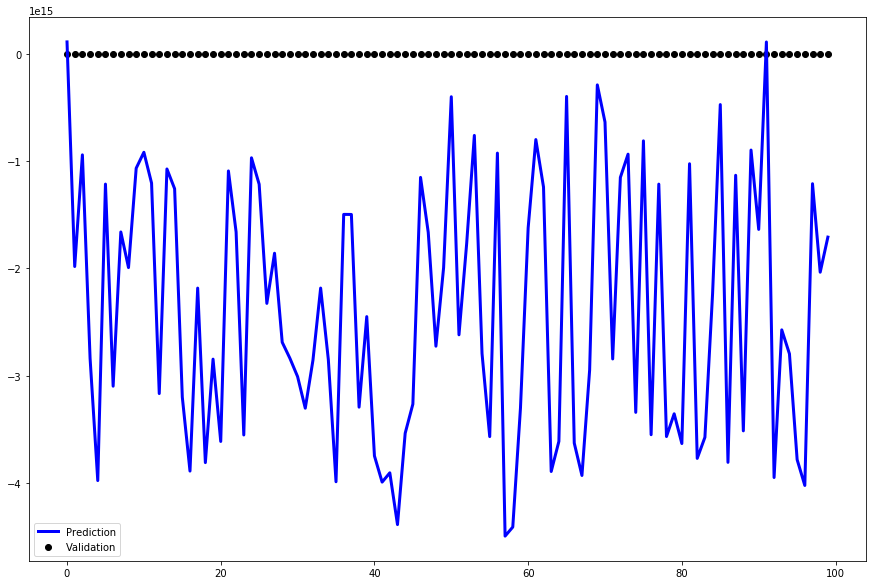

In [164]:
# The coefficients
print('Coefficients: \n', sgdr.coef_)

# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_valid, predictions_sgdr))

# Explained variance score: 1 is perfect prediction
print('R-squared: %.2f' % r2_score(y_valid, predictions_sgdr))

# Plot outputs
plt.figure(figsize=(15,10))
plt.scatter(range(100), y_valid[0:100],  color='black', label="Validation")
plt.plot(range(100), predictions_sgdr[0:100], color='blue', linewidth=3, label="Prediction")

plt.legend()

plt.show()

### Multi-layer Perceptron regressor

In [174]:
from sklearn.neural_network import MLPRegressor

mlpr = MLPRegressor()
model_mlpr = mlpr.fit(X_train, y_train)
predictions_mlpr = mlpr.predict(X_valid)

In [176]:
# save the model to disk
filename = 'finalized_model_mlpr.sav'
pickle.dump(model_mlpr, open(filename, 'wb'))

Mean squared error: 0.48


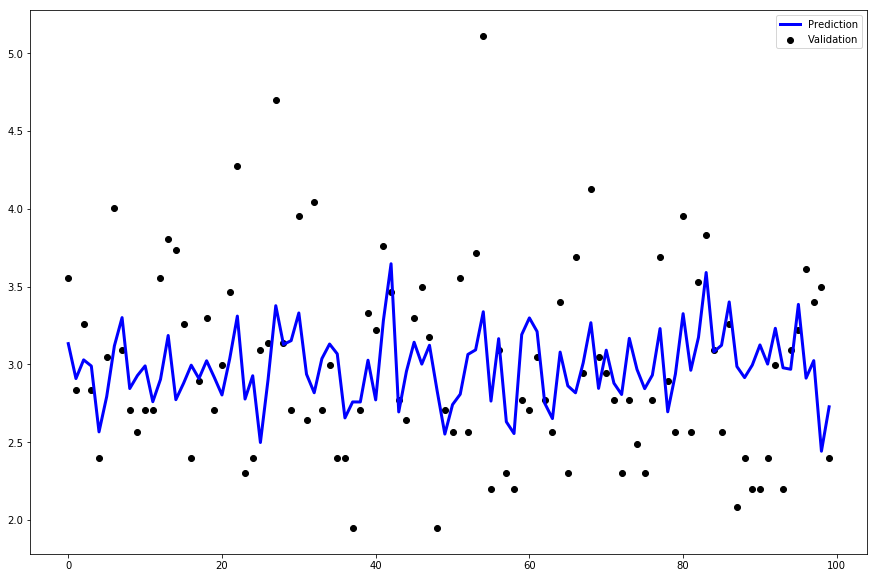

In [175]:
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_valid, predictions_mlpr))


# Plot outputs
plt.figure(figsize=(15,10))
plt.scatter(range(100), y_valid[0:100],  color='black', label="Validation")
plt.plot(range(100), predictions_mlpr[0:100], color='blue', linewidth=3, label="Prediction")

plt.legend()

plt.show()